**I. Business Understanding**
The core objective of this excercise is to determine what features or characteristics of a vehicle determine or influence the price. Those characteristics can be anything from odometer reading to the vehicle color. However, not all characteristics are not weighted equally to drive the vehicle  price. One or more of these vehicle features may hava a stronger influence in determining the final price. The end state is to identify for the core dealerships what factors are the most important as this will help these dealerships in how best to invest in vehicle management and purchases.

**II. Situation Assessment**
Resources for this excercise include a Kaggle Dataset that has been paired down from 3 million used cars to 426K. Due to limited compute resources, a sample of this dataset (10%) will be taken to best determine the characteristics that influence the price.  Simultaneously, the goal is to employ different regression models that best model and attempt to explain the data while minimizing the error value between predicted values and actual values. In this way, the model can best assess and explain the underlying data. The metrics to determine model viability will be Mean Squared Error(MSE), and R2. MSE indicates the average squared error between the actual and predicted values. A lower MSE means better predictability and accuracy. R2 indicates how best the dependent variable is explained by the model. A higher R2 ensures how best the model explains the data.


**III. Data Understanding and Exploration**

In [216]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [218]:
#Importing the original dataset
df = pd.read_csv('sample_data/vehicles.csv')

In [187]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [219]:
df.tail

<bound method NDFrame.tail of                id                  region  price    year manufacturer  \
0      7222695916                prescott   6000     NaN          NaN   
1      7218891961            fayetteville  11900     NaN          NaN   
2      7221797935            florida keys  21000     NaN          NaN   
3      7222270760  worcester / central MA   1500     NaN          NaN   
4      7210384030              greensboro   4900     NaN          NaN   
...           ...                     ...    ...     ...          ...   
25810  7315245469         fresno / madera  36590  2019.0    chevrolet   
25811  7315245413         fresno / madera  25990  2014.0          bmw   
25812  7315245520         fresno / madera  68777     NaN          NaN   
25813  7315205091         fresno / madera   2300  2000.0        honda   
25814  7315197162         fresno / madera   3500  2004.0          NaN   

                          model condition    cylinders    fuel  odometer  \
0                           NaN       NaN          NaN     NaN       NaN   
1                           NaN       NaN          NaN     NaN       NaN   
2                           NaN       NaN          NaN     NaN       NaN   
3                           NaN       NaN          NaN     NaN       NaN   
4                           NaN       NaN          NaN     NaN       NaN   
...                         ...       ...          ...     ...       ...   
25810       silverado 1500 crew      good  8 cylinders     gas    7619.0   
25811  z4 sdrive28i roadster 2d      good          NaN   other   61419.0   
25812      Super Duty F-250 SRW       NaN  8 cylinders  diesel   30310.0   
25813                    accord      fair  6 cylinders     gas  135000.0   
25814          2004 handa civic       NaN          NaN     gas  155000.0   

      title_status transmission                VIN drive      size    type  \
0              NaN          NaN                NaN   NaN       NaN     NaN   
1              NaN          NaN                NaN   NaN       NaN     NaN   
2              NaN          NaN                NaN   NaN       NaN     NaN   
3              NaN          NaN                NaN   NaN       NaN     NaN   
4              NaN          NaN                NaN   NaN       NaN     NaN   
...            ...          ...                ...   ...       ...     ...   
25810        clean        other  3GCPWCED5KG232523   NaN       NaN  pickup   
25811        clean        other  WBALL5C50EJ105449   rwd       NaN   other   
25812        clean    automatic  1FT7W2BT2KEF16169   4wd       NaN  pickup   
25813      salvage    automatic                NaN   NaN  mid-size   sedan   
25814        clean    automatic                NaN   NaN       NaN   sedan   

      paint_color state  
0             NaN    az  
1             NaN    ar  
2             NaN    fl  
3             NaN    ma  
4             NaN    nc  
...           ...   ...  
25810       white    ca  
25811       black    ca  
25812       white    ca  
25813       white    ca  
25814         NaN   NaN  

[25815 rows x 18 columns]>

In [221]:
# Both the head and tail of the dataframe indicate that there are several values that indicate null values

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25815 entries, 0 to 25814
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25815 non-null  int64  
 1   region        25815 non-null  object 
 2   price         25815 non-null  int64  
 3   year          25651 non-null  float64
 4   manufacturer  24676 non-null  object 
 5   model         25433 non-null  object 
 6   condition     15139 non-null  object 
 7   cylinders     15371 non-null  object 
 8   fuel          25631 non-null  object 
 9   odometer      25539 non-null  float64
 10  title_status  25406 non-null  object 
 11  transmission  25710 non-null  object 
 12  VIN           16104 non-null  object 
 13  drive         18201 non-null  object 
 14  size          6757 non-null   object 
 15  type          20137 non-null  object 
 16  paint_color   18818 non-null  object 
 17  state         25814 non-null  object 
dtypes: float64(2), int64(2), o

In [222]:
#25815 entries in the dataset, 18 features/variables, several are category variables, a few are numeric in nature. As indicated, several data points have null values

In [223]:
df.describe()

,id,price,year,odometer
count,2.581500e+04,2.581500e+04,25651.000000,2.553900e+04
mean,7.311136e+09,6.223153e+04,2011.763791,9.836468e+04
std,5.461112e+06,6.178369e+06,9.822701,3.316981e+05
min,7.208550e+09,0.000000e+00,1901.000000,0.000000e+00
25%,7.307562e+09,7.650000e+03,2009.000000,3.096050e+04
50%,7.311986e+09,1.725000e+04,2014.000000,7.400000e+04
75%,7.315445e+09,2.977700e+04,2017.000000,1.252070e+05
max,7.316901e+09,9.876543e+08,2022.000000,1.000000e+07


In [224]:
#Numeric variables include an average of 2011 as the average year, a 1900 year old vehicle and newest is 2022.

In [225]:
df.shape

(25815, 18)

In [226]:
df = df[df['price'] <= 200000]

print("Filtered DataFrame:")
print(df)

Filtered DataFrame:
               id                  region  price    year manufacturer  \
0      7222695916                prescott   6000     NaN          NaN   
1      7218891961            fayetteville  11900     NaN          NaN   
2      7221797935            florida keys  21000     NaN          NaN   
3      7222270760  worcester / central MA   1500     NaN          NaN   
4      7210384030              greensboro   4900     NaN          NaN   
...           ...                     ...    ...     ...          ...   
25810  7315245469         fresno / madera  36590  2019.0    chevrolet   
25811  7315245413         fresno / madera  25990  2014.0          bmw   
25812  7315245520         fresno / madera  68777     NaN          NaN   
25813  7315205091         fresno / madera   2300  2000.0        honda   
25814  7315197162         fresno / madera   3500  2004.0          NaN   

                          model condition    cylinders    fuel  odometer  \
0                          

<ipython-input-227-c6933837b818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


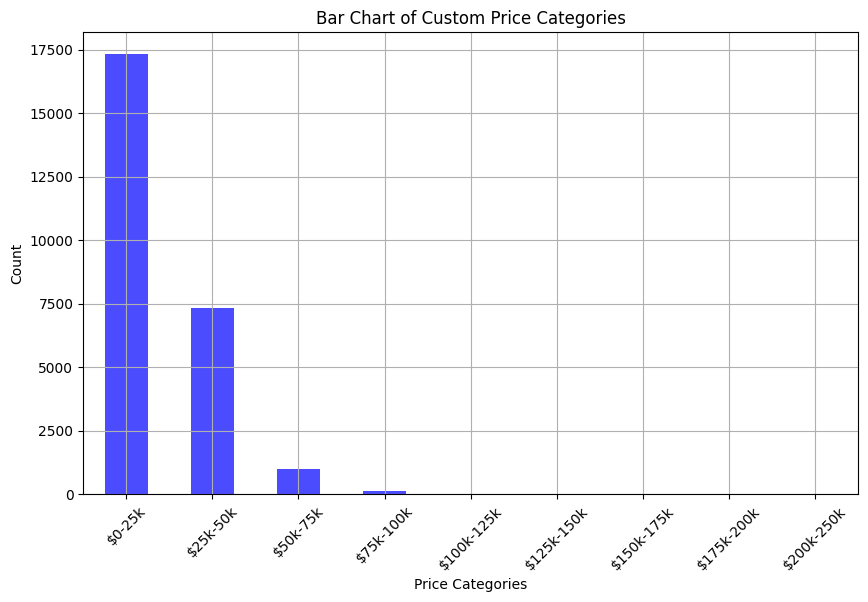

In [227]:
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 250000]  # Custom bins
labels = ['$0-25k', '$25k-50k', '$50k-75k', '$75k-100k', '$100k-125k', '$125k-150k', '$150k-175k', '$175k-200k', '$200k-250k']

# Group prices into categories
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Count number of entries in each category
category_counts = df['price_category'].value_counts()

# Plotting the grouped data
plt.figure(figsize=(10, 6))  # Adjust size as needed
category_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Custom Price Categories')
plt.xlabel('Price Categories')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [228]:
df.describe()

,id,price,year,odometer
count,2.580800e+04,25808.000000,25644.000000,2.553200e+04
mean,7.311136e+09,20059.699008,2011.768679,9.830731e+04
std,5.461466e+06,16077.922006,9.805403,3.316458e+05
min,7.208550e+09,0.000000,1901.000000,0.000000e+00
25%,7.307562e+09,7600.000000,2009.000000,3.096600e+04
50%,7.311986e+09,17199.500000,2014.000000,7.400000e+04
75%,7.315445e+09,29709.750000,2017.000000,1.252070e+05
max,7.316901e+09,179988.000000,2022.000000,1.000000e+07


In [229]:
#Max price is $179,988 and the least is $0

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25808 entries, 0 to 25814
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              25808 non-null  int64   
 1   region          25808 non-null  object  
 2   price           25808 non-null  int64   
 3   year            25644 non-null  float64 
 4   manufacturer    24670 non-null  object  
 5   model           25427 non-null  object  
 6   condition       15139 non-null  object  
 7   cylinders       15367 non-null  object  
 8   fuel            25624 non-null  object  
 9   odometer        25532 non-null  float64 
 10  title_status    25399 non-null  object  
 11  transmission    25703 non-null  object  
 12  VIN             16100 non-null  object  
 13  drive           18197 non-null  object  
 14  size            6755 non-null   object  
 15  type            20133 non-null  object  
 16  paint_color     18814 non-null  object  
 17  state           2

In [231]:
#25808 datapoints across 18 features

**Univariate Analysis**

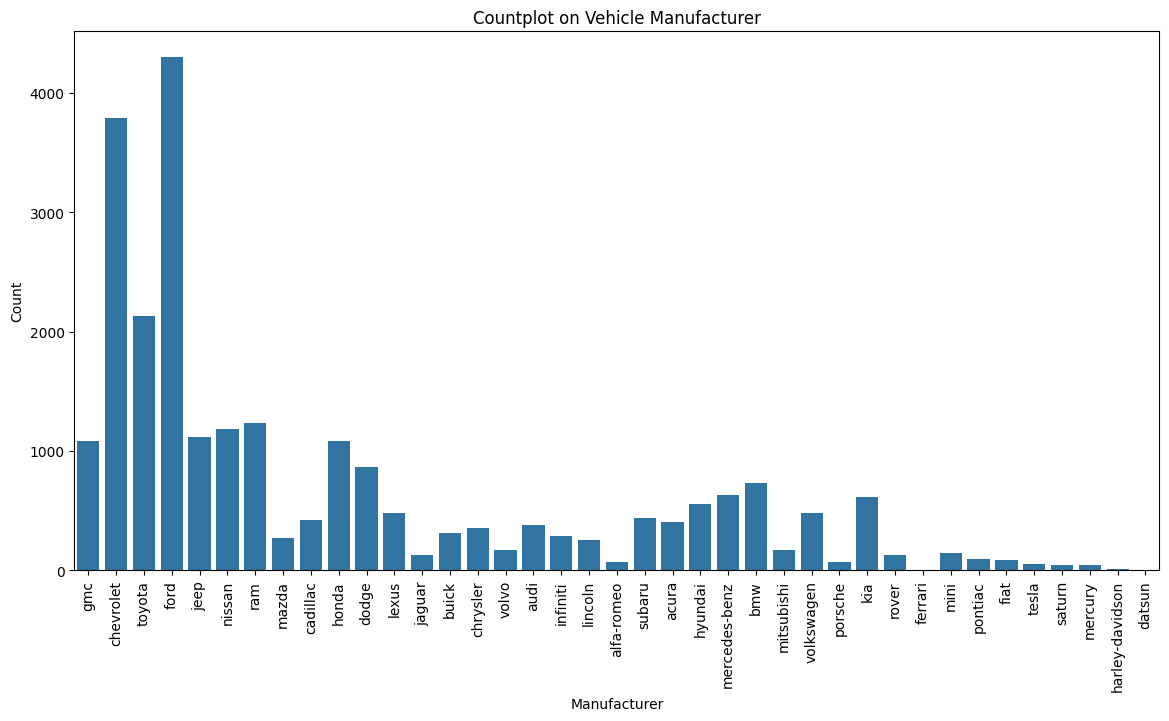

In [232]:
# Countplot of different companies
plt.figure(figsize=(14,7))
sns.countplot(x='manufacturer', data=df)
plt.xticks(rotation=90)
plt.title('Countplot on Vehicle Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [233]:
# Ford is the most manufactured vehicle , Aston-Martin is the least manufactured vehicle

Minimum year: 1901.0
Maximum year: 2022.0


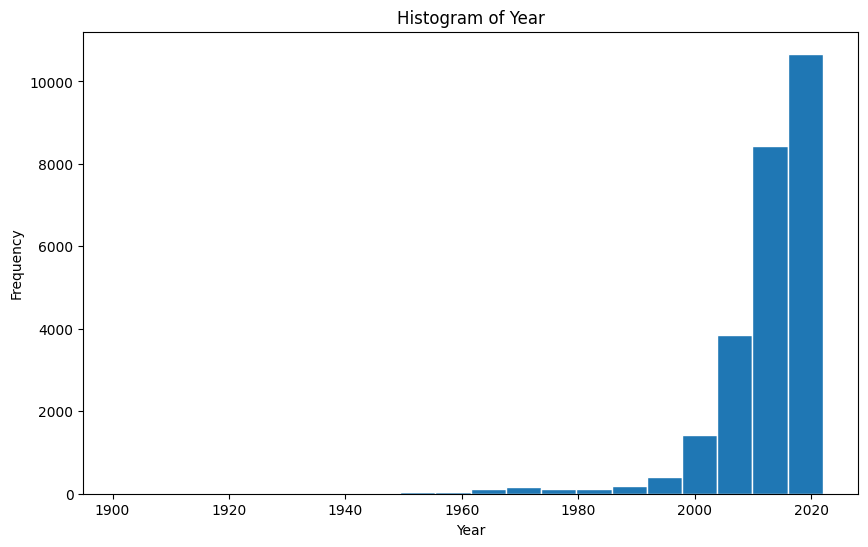

In [234]:
import matplotlib.pyplot as plt
min_year_w = df['year'].min()
max_year_w = df['year'].max()
print(f"Minimum year: {min_year_w}")
print(f"Maximum year: {max_year_w}")
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=20, edgecolor='white')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [235]:
# The dataset contains car information from 1900 to 2022. Most cars were counted during 2018, and the least in 1900. Data distribution indicates that the data is a left skewed distribution. This also indicates the majority of the vehicles were produced in recent years probably due to increased popularity of vehicle consumption.

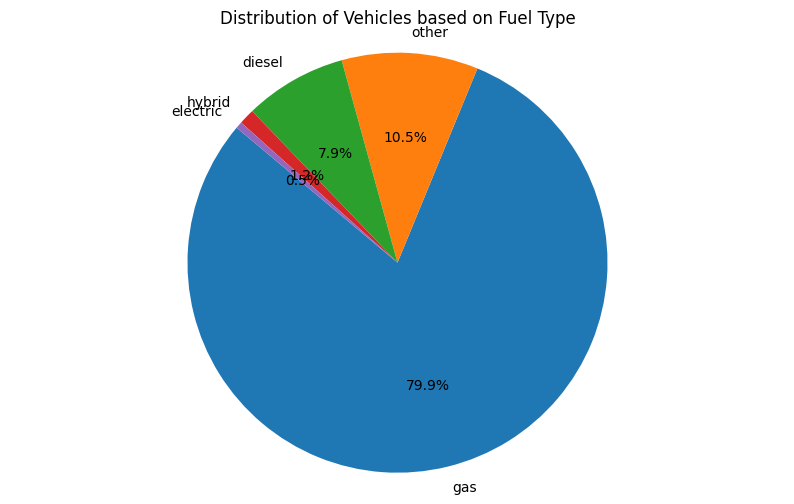

In [236]:
fuel_type_w = df['fuel'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(fuel_type_w, labels=fuel_type_w.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicles based on Fuel Type')
plt.axis('equal')
plt.show()

In [237]:
# Based on the data in the datset 83% of vehicles run on gas. Next fuel type includes 'Other' followed by 'Diesel'. The least fuel type is electric. Had this dataset been more current, it's likely that electric fuel type will more popular. And depending on the region, or state like California, electric vehicles tend to be more popular.

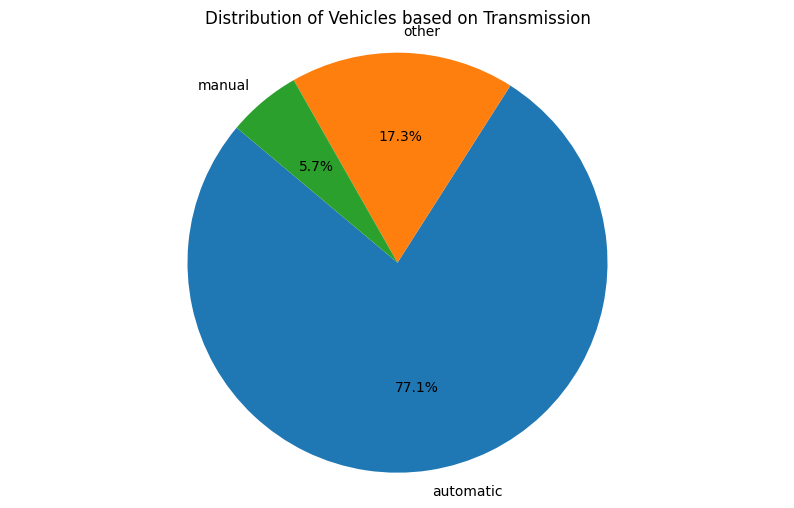

In [238]:
transmission_type_w = df['transmission'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(transmission_type_w, labels=transmission_type_w.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicles based on Transmission')
plt.axis('equal')
plt.show()

In [239]:
#Based on the dataset close to 80% of the dataset suggests that vehicle type leverages automatic transmission. 6.5% of the vehicles leverage manual transmission. This of course would vary based on more granular regional data. For example, in California, it's possible that more vehicles would leverage manual transmission.

<function matplotlib.pyplot.show(close=None, block=None)>

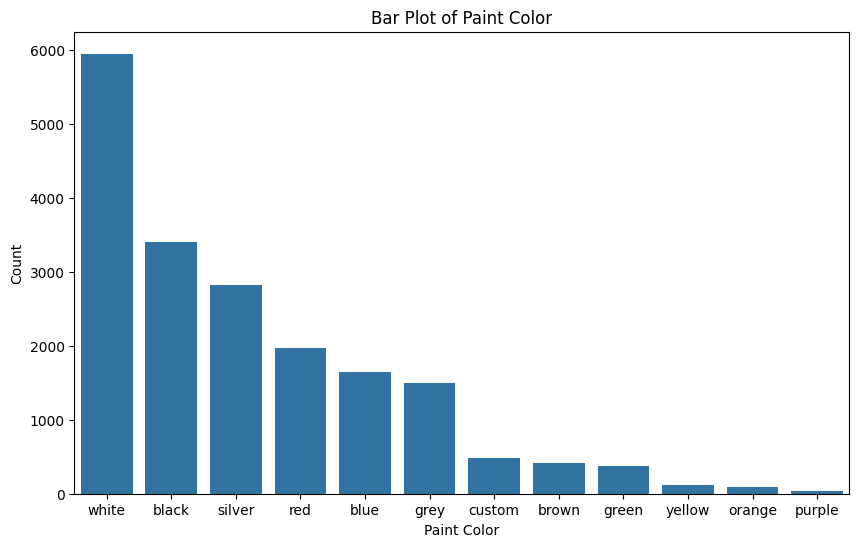

In [240]:
paint_color_w = df['paint_color'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=paint_color_w.index, y=paint_color_w.values)
plt.title('Bar Plot of Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show

In [249]:
# The most painted car is white; The least painted car is purple.

<function matplotlib.pyplot.show(close=None, block=None)>

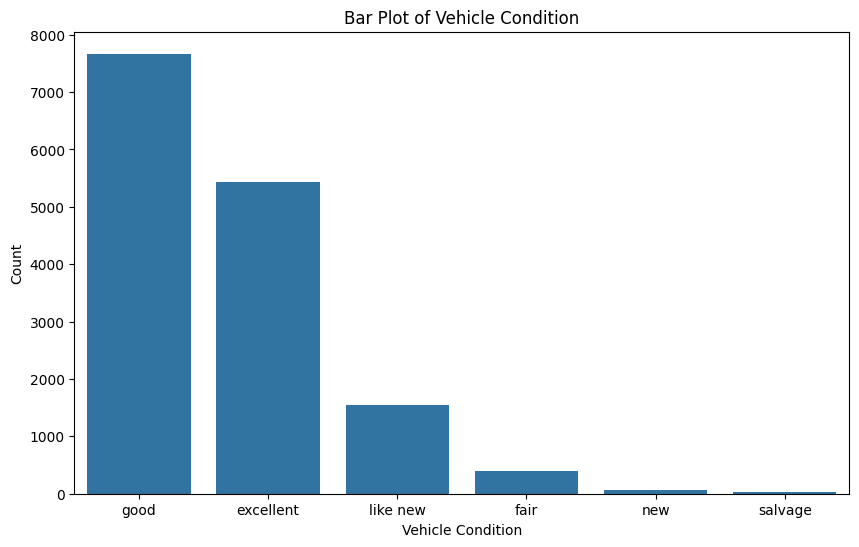

In [250]:
condition_w = df['condition'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_w.index, y=condition_w.values)
plt.title('Bar Plot of Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.show

In [248]:
#Most vehicles are in excellent condition with the least requiring salvage. This indicates that vehicles in the dataset, have been well maintained. This is of course also dependant on the age of the vehicle and other features e.g maintenance cost, disposable income available for car maintenance.

<function matplotlib.pyplot.show(close=None, block=None)>

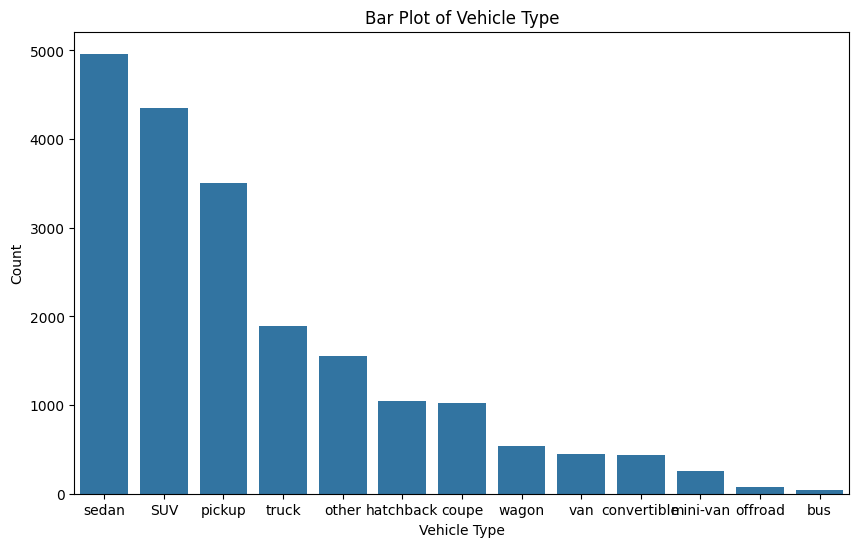

In [244]:
type_w = df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=type_w.index, y=type_w.values)
plt.title('Bar Plot of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show

In [251]:
# Clearly the most popular vehicle is the sedan

**Bivariate Analysis**

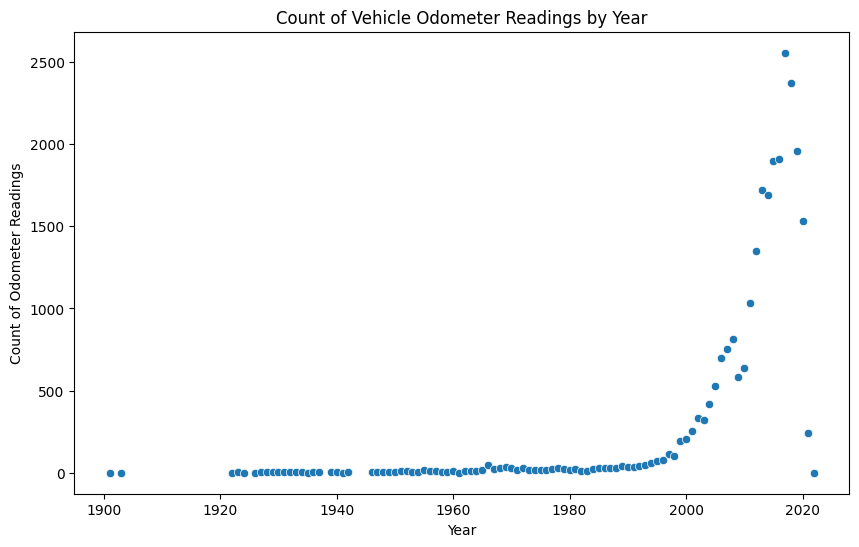

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by 'year' and count the number of odometer readings for each year
yearly_odometer_counts = df.groupby('year')['odometer'].count().reset_index()

plt.figure(figsize=(10, 6))

sns.scatterplot(x=yearly_odometer_counts['year'], y=yearly_odometer_counts['odometer'])


plt.title('Count of Vehicle Odometer Readings by Year')
plt.xlabel('Year')
plt.ylabel('Count of Odometer Readings')


plt.show()

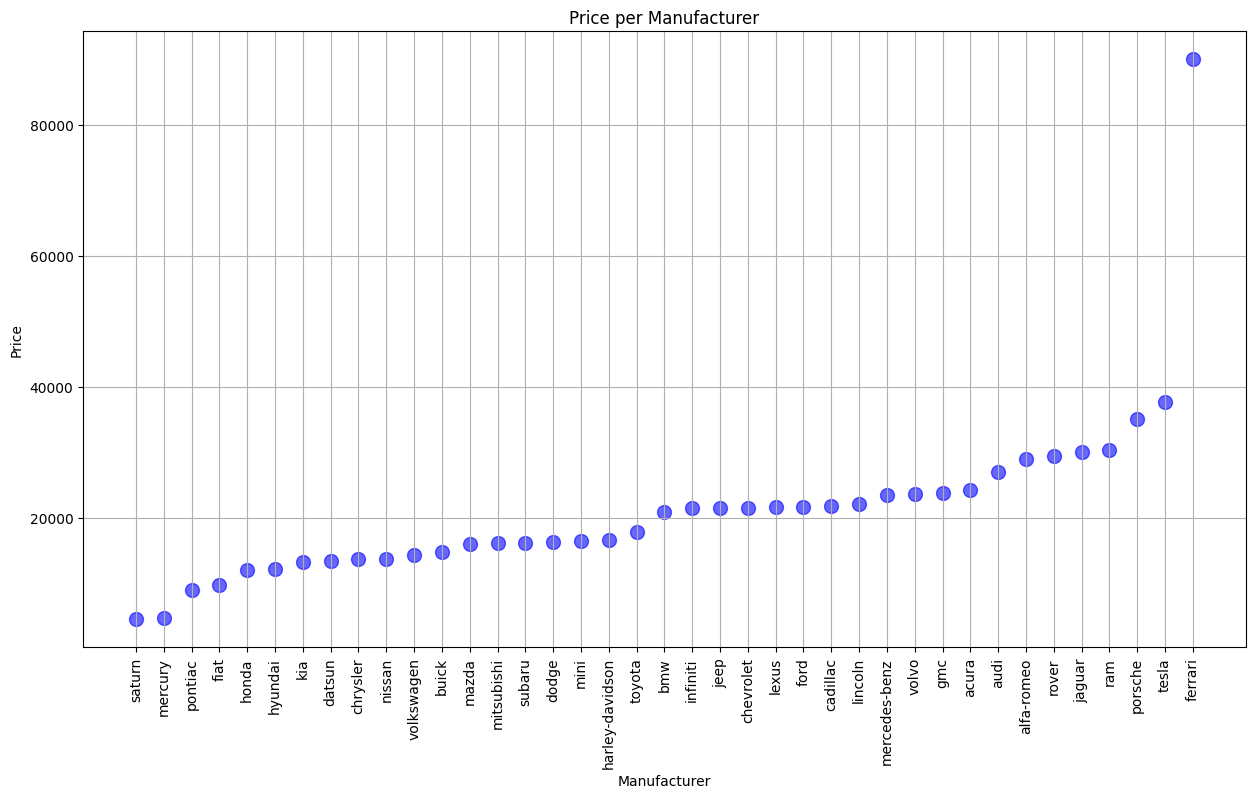

In [252]:
price_per_manufacturer = df.groupby('manufacturer')['price'].mean().reset_index()
price_per_manufacturer = price_per_manufacturer.sort_values(by='price')
plt.figure(figsize=(15, 8))
plt.scatter(price_per_manufacturer['manufacturer'], price_per_manufacturer['price'], s=100, c='blue', alpha=0.6)
plt.title('Price per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<ipython-input-253-0ee0b0390804>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer', y='price', data=price_per_manufacturer, palette='viridis')


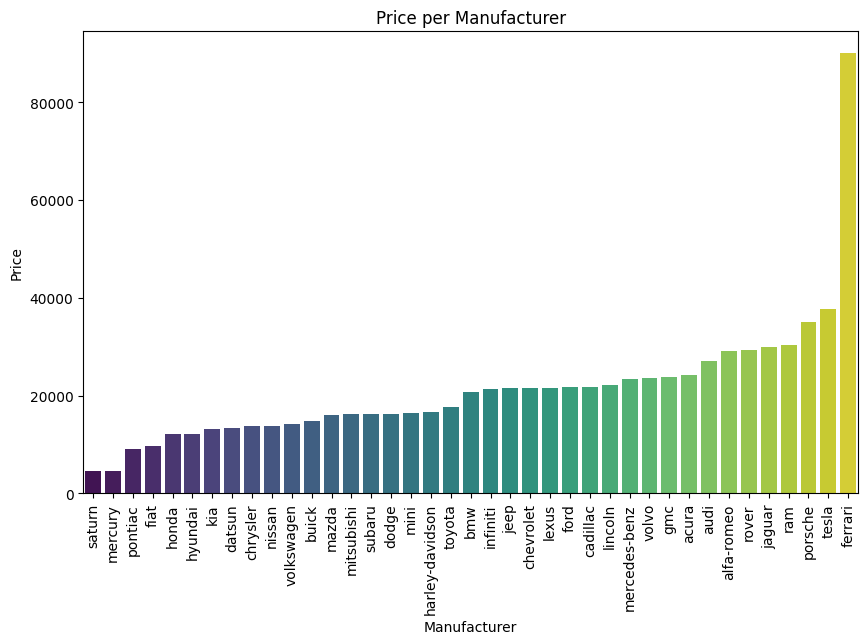

In [253]:
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer', y='price', data=price_per_manufacturer, palette='viridis')
plt.title('Price per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [254]:
# The most expensive car is a ferrari which is not a suprise based on domain knowledge. The cheapest car is a saturn, a displaced division of General Motors and no longer produces vehicles under that brand.

<ipython-input-255-2ac75c12905d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel', y='price', data=df, palette='viridis')


Text(0, 0.5, 'Price')

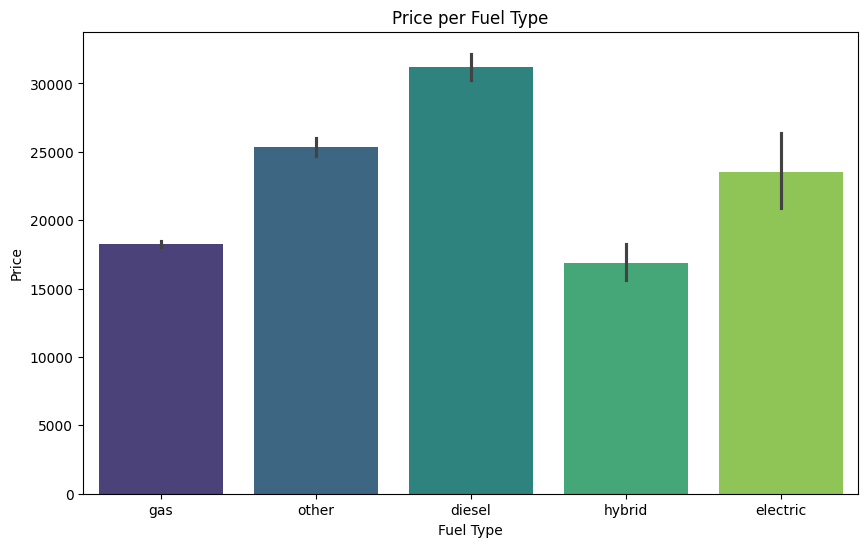

In [255]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=df, palette='viridis')
plt.title('Price per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

In [256]:
# Diesel Vehicles tend to be the most expensive in price. Not suprising since diesel vehicles may not have the mass scale to reduce price per unit and hence may be more expensive.

<ipython-input-257-e81503a4c81c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='price', data=df, palette='viridis')


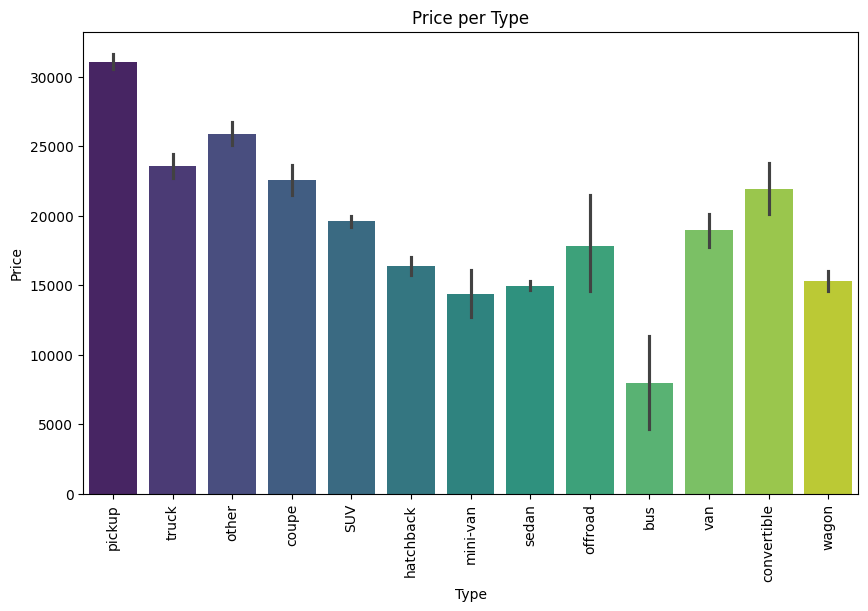

In [257]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=df, palette='viridis')
plt.title('Price per Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [258]:
#Pickup trucks tend be the most expensive followed by convertible

<ipython-input-259-225954c5b845>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='price', data=df, palette='viridis')


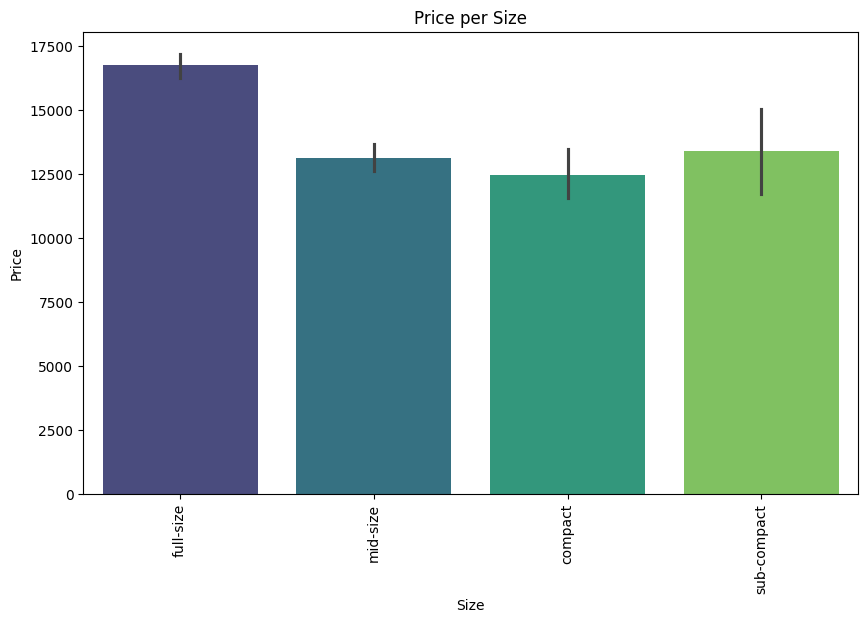

In [259]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='price', data=df, palette='viridis')
plt.title('Price per Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [260]:
#Full size vehicles tend to be the most expensive as per price in comparison to mid-size, compact, and sub-compact.

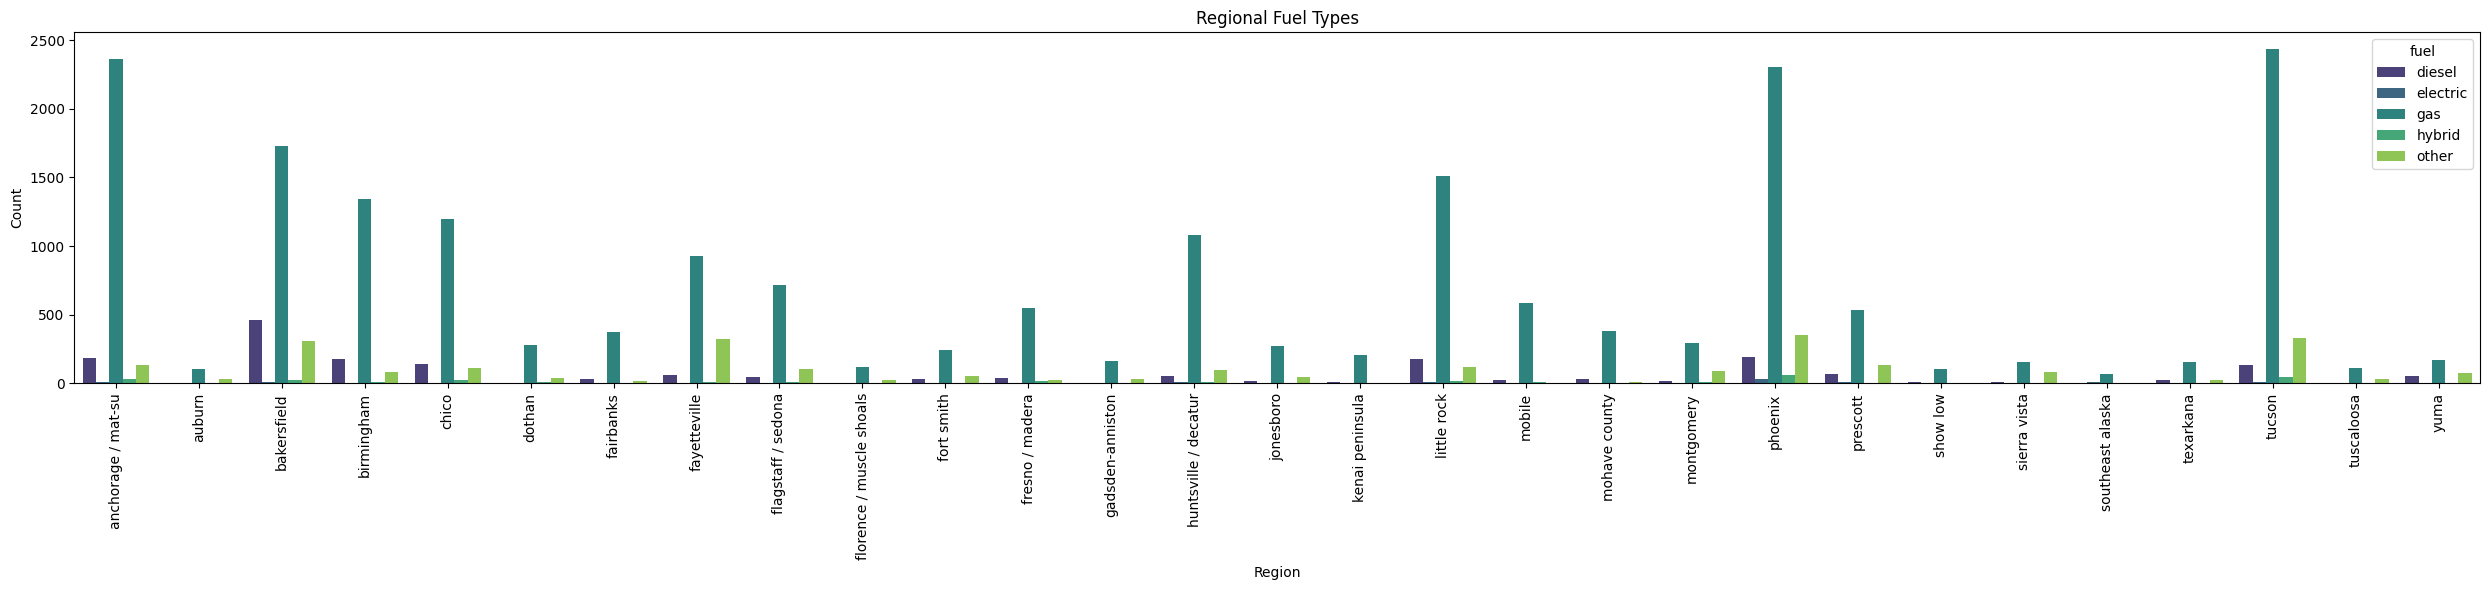

In [261]:
plt.figure(figsize=(25, 6))

# Group by 'region' and 'fuel' and count occurrences
grouped_df = df.groupby(['region', 'fuel']).size().reset_index(name='count')

sns.barplot(x='region', y='count', hue='fuel', data=grouped_df, palette='viridis', linewidth=4)


plt.title('Regional Fuel Types')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

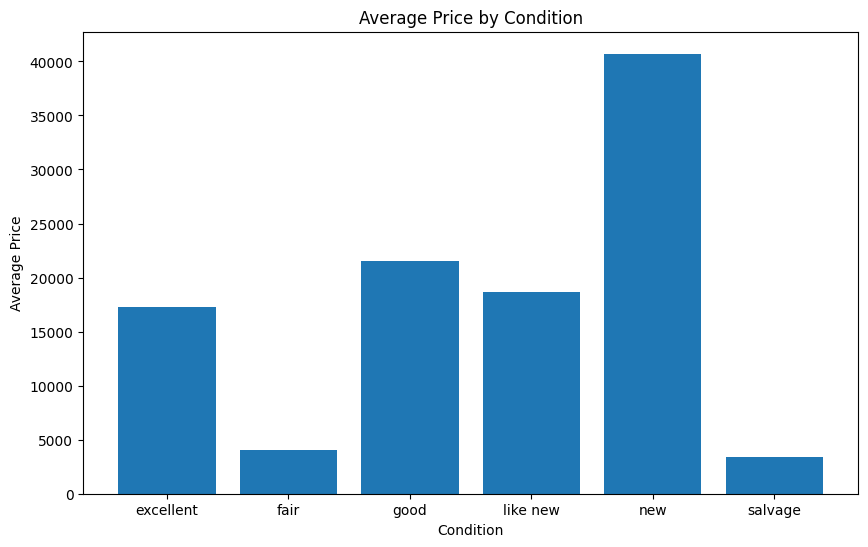

In [262]:
condition_vs_price = df.groupby('condition')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(condition_vs_price['condition'], condition_vs_price['price'])
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show

<ipython-input-263-588b49ae567e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='manufacturer', data=df, palette='viridis', linewidth=4)


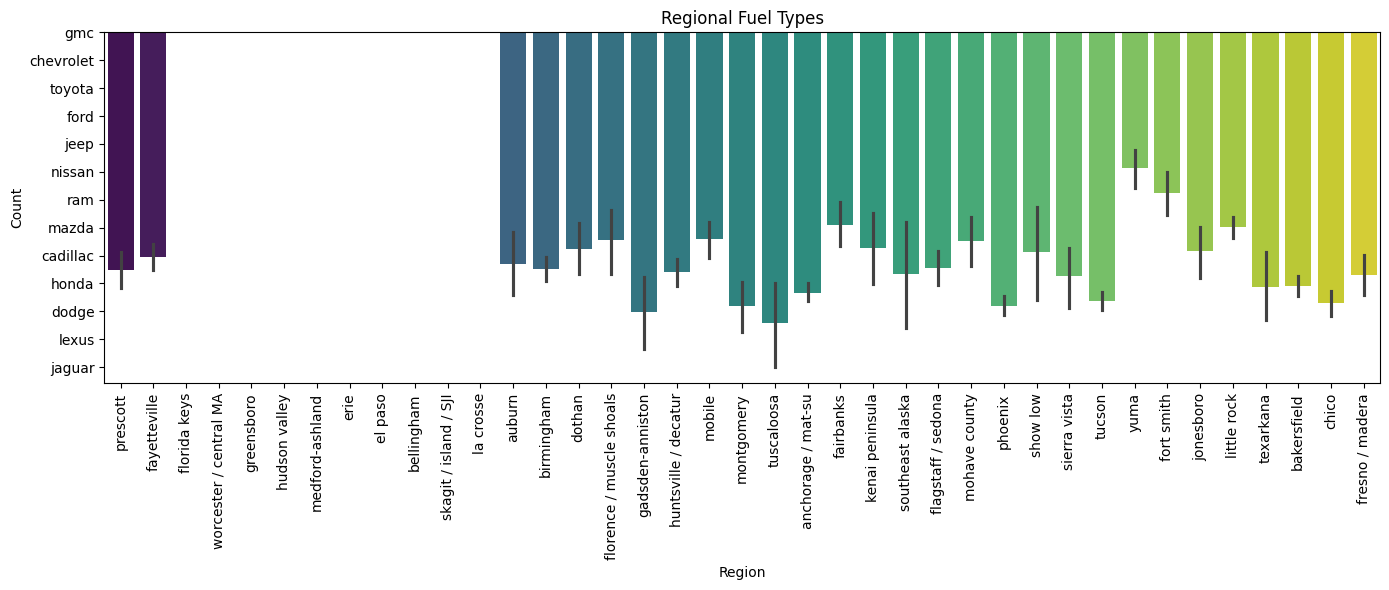

In [263]:
plt.figure(figsize=(14, 6))

# Group by 'region' and 'fuel' and count occurrences
grouped_df_rm = df.groupby(['region', 'manufacturer']).size().reset_index(name='count')

sns.barplot(x='region', y='manufacturer', data=df, palette='viridis', linewidth=4)

# Add titles and labels
plt.title('Regional Fuel Types')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Data Preprocessing and Transformation**

In [264]:
df.isnull().sum()
#Checking for null values

id                    0
region                0
price                 0
year                164
manufacturer       1138
model               381
condition         10669
cylinders         10441
fuel                184
odometer            276
title_status        409
transmission        105
VIN                9708
drive              7611
size              19053
type               5675
paint_color        6994
state                 1
price_category        0
dtype: int64

In [265]:
#checking the percentage of missing values in each variable
df.isnull().sum()/len(df)*100

id                 0.000000
region             0.000000
price              0.000000
year               0.635462
manufacturer       4.409485
model              1.476286
condition         41.339895
cylinders         40.456448
fuel               0.712957
odometer           1.069436
title_status       1.584780
transmission       0.406851
VIN               37.616243
drive             29.490856
size              73.825945
type              21.989306
paint_color       27.100124
state              0.003875
price_category     0.000000
dtype: float64

The highest percentage of null values appear in the size variable/feature and the condition variable.

In [266]:
df.drop(['id', 'VIN'], axis=1)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price_category
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,$0-25k
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,$0-25k
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,$0-25k
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,$0-25k
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,$0-25k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25810,fresno / madera,36590,2019.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,7619.0,clean,other,NaN,NaN,pickup,white,ca,$25k-50k
25811,fresno / madera,25990,2014.0,bmw,z4 sdrive28i roadster 2d,good,NaN,other,61419.0,clean,other,rwd,NaN,other,black,ca,$25k-50k
25812,fresno / madera,68777,NaN,NaN,Super Duty F-250 SRW,NaN,8 cylinders,diesel,30310.0,clean,automatic,4wd,NaN,pickup,white,ca,$50k-75k
25813,fresno / madera,2300,2000.0,honda,accord,fair,6 cylinders,gas,135000.0,salvage,automatic,NaN,mid-size,sedan,white,ca,$0-25k


In [267]:
#Dropping ID, VIN as they may not be relevant to the features against the price

In [268]:
 df_working = df.copy()

In [269]:
#grouping category variables
categorical_columns = df_working.select_dtypes(include=['object', 'category']).columns

In [270]:
for c in categorical_columns:
    df_working[c] = df_working[c].astype('category')
    mode_value = df_working[c].mode()[0]
    df_working[c].fillna(mode_value, inplace=True)


In [271]:
#Filling NA values with the most repeated values

In [272]:
numerical_columns = df_working.select_dtypes(include=['int64', 'float64']).columns

In [273]:
for column in numerical_columns:
    mean_value = df_working[column].mean()  # Calculate the mean of the column
    df_working[column].fillna(mean_value, inplace=True)

In [274]:
df_working.isnull().sum()

id                0
region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
VIN               0
drive             0
size              0
type              0
paint_color       0
state             0
price_category    0
dtype: int64

In [275]:
#Checking for any null values

In [ ]:
#Creating a sample and a smaller dataset to work with

In [276]:
sample_fraction = 0.15  # Sample size as a percentage of the original dataset
df_sample =  df_working.sample(frac=sample_fraction, random_state=42)
print(f"Original dataset size: {len(df_working)}")
print(f"Sample dataset size: {len(df_sample)}")
print(df_sample.head())

Original dataset size: 25808
Sample dataset size: 3871
               id       region  price    year manufacturer  \
19868  7311701394  little rock  32900  2019.0         ford   
15025  7314734138       tucson  35590  2019.0          gmc   
3815   7316215594       mobile  19890  2017.0         ford   
14375  7315890864       tucson   8500  2017.0    chevrolet   
12084  7315905232      phoenix   3900  1997.0       nissan   

                        model  condition    cylinders fuel  odometer  \
19868                 transit   like new  6 cylinders  gas    6735.0   
15025  sierra 1500 double cab       good  8 cylinders  gas   26470.0   
3815           expedition xlt   like new  6 cylinders  gas  139449.0   
14375                sonic ls  excellent  4 cylinders  gas   69319.0   
12084              pathfinder       good  6 cylinders  gas     200.0   

      title_status transmission                VIN drive       size    type  \
19868        clean    automatic  1FTYR1YM7KKA86825   rwd  fu

In [277]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 19868 to 22831
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              3871 non-null   int64   
 1   region          3871 non-null   category
 2   price           3871 non-null   int64   
 3   year            3871 non-null   float64 
 4   manufacturer    3871 non-null   category
 5   model           3871 non-null   category
 6   condition       3871 non-null   category
 7   cylinders       3871 non-null   category
 8   fuel            3871 non-null   category
 9   odometer        3871 non-null   float64 
 10  title_status    3871 non-null   category
 11  transmission    3871 non-null   category
 12  VIN             3871 non-null   category
 13  drive           3871 non-null   category
 14  size            3871 non-null   category
 15  type            3871 non-null   category
 16  paint_color     3871 non-null   category
 17  state         

In [278]:
df_working_le = df_sample.copy()

In [279]:
#Using Labelencoder as part of the data preprocessing stage to transform categorical data into a numerical format so that it can injected as part of the machine learning. Each of the catgeorical columns like Region, Manufacturer, model, condition, cylinders, fuel, title_status , transmission etc is encoded into numeric labels. This will ensure compatibility with ML algorithms which are best suited with numeric input.

In [280]:
df_working_le = df_working_le.drop(['id', 'VIN'], axis=1)

In [281]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 19868 to 22831
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   region          3871 non-null   category
 1   price           3871 non-null   int64   
 2   year            3871 non-null   float64 
 3   manufacturer    3871 non-null   category
 4   model           3871 non-null   category
 5   condition       3871 non-null   category
 6   cylinders       3871 non-null   category
 7   fuel            3871 non-null   category
 8   odometer        3871 non-null   float64 
 9   title_status    3871 non-null   category
 10  transmission    3871 non-null   category
 11  drive           3871 non-null   category
 12  size            3871 non-null   category
 13  type            3871 non-null   category
 14  paint_color     3871 non-null   category
 15  state           3871 non-null   category
 16  price_category  3871 non-null   category
dtypes: category(14

In [286]:
from sklearn.preprocessing import LabelEncoder
Region_le = LabelEncoder()
df_working_le['region'] = Region_le.fit_transform(df_working_le['region'])
Manufacturer_le = LabelEncoder()
df_working_le['manufacturer'] = Manufacturer_le.fit_transform(df_working_le['manufacturer'])
Model_le = LabelEncoder()
df_working_le['model'] = Model_le.fit_transform(df_working_le['model'])
Condition_le = LabelEncoder()
df_working_le['condition'] = Condition_le.fit_transform(df_working_le['condition'])
Cylinders_le = LabelEncoder()
df_working_le['cylinders'] = Cylinders_le.fit_transform(df_working_le['cylinders'])
Fuel_le = LabelEncoder()
df_working_le['fuel'] = Fuel_le.fit_transform(df_working_le['fuel'])
Title_Status_le = LabelEncoder()
df_working_le['title_status'] = Title_Status_le.fit_transform(df_working_le['title_status'])
Transmission_le = LabelEncoder()
df_working_le['transmission'] = Transmission_le.fit_transform(df_working_le['transmission'])
Drive_le = LabelEncoder()
df_working_le['drive'] = Drive_le.fit_transform(df_working_le['drive'])
Size_le = LabelEncoder()
df_working_le['size'] = Size_le.fit_transform(df_working_le['size'])
Type_le = LabelEncoder()
df_working_le['type'] = Type_le.fit_transform(df_working_le['type'])
Paint_Color_le = LabelEncoder()
df_working_le['paint_color'] = Paint_Color_le.fit_transform(df_working_le['paint_color'])
State_le = LabelEncoder()
df_working_le['state'] = State_le.fit_transform(df_working_le['state'])
Price_category_le = LabelEncoder()
df_working_le['price_category'] = Price_category_le.fit_transform(df_working_le['price_category'])

In [287]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 19868 to 22831
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          3871 non-null   int64  
 1   price           3871 non-null   int64  
 2   year            3871 non-null   float64
 3   manufacturer    3871 non-null   int64  
 4   model           3871 non-null   int64  
 5   condition       3871 non-null   int64  
 6   cylinders       3871 non-null   int64  
 7   fuel            3871 non-null   int64  
 8   odometer        3871 non-null   float64
 9   title_status    3871 non-null   int64  
 10  transmission    3871 non-null   int64  
 11  drive           3871 non-null   int64  
 12  size            3871 non-null   int64  
 13  type            3871 non-null   int64  
 14  paint_color     3871 non-null   int64  
 15  state           3871 non-null   int64  
 16  price_category  3871 non-null   int64  
dtypes: float64(2), int64(15)
memory u

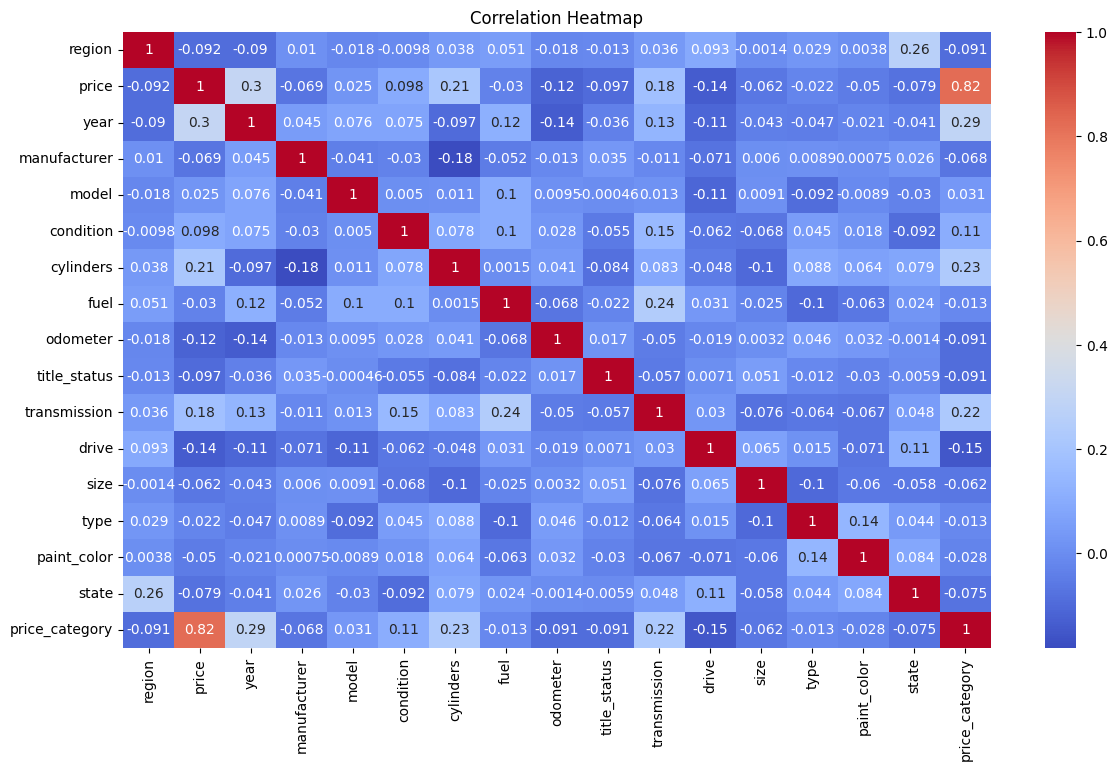

In [288]:
corr = df_working_le.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The most correlated values to price include are the year, and transmission, and cylinders.  The most negative or inverse correlation to price are the state, and drive features. Interetingly the highest correlation is .82 between the price_category and price.

In [289]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 19868 to 22831
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          3871 non-null   int64  
 1   price           3871 non-null   int64  
 2   year            3871 non-null   float64
 3   manufacturer    3871 non-null   int64  
 4   model           3871 non-null   int64  
 5   condition       3871 non-null   int64  
 6   cylinders       3871 non-null   int64  
 7   fuel            3871 non-null   int64  
 8   odometer        3871 non-null   float64
 9   title_status    3871 non-null   int64  
 10  transmission    3871 non-null   int64  
 11  drive           3871 non-null   int64  
 12  size            3871 non-null   int64  
 13  type            3871 non-null   int64  
 14  paint_color     3871 non-null   int64  
 15  state           3871 non-null   int64  
 16  price_category  3871 non-null   int64  
dtypes: float64(2), int64(15)
memory u

In [290]:
#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

In [294]:
#Model run 1

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']

# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
degree = 2
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

model_pgs = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), Ridge())

# Perform grid search
grid_search = GridSearchCV(model_pgs, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha: 10.0
R2 Score: -0.0864614516599298
Mean Squared Error: 300282418.541428


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.87036e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [295]:
# Attempting to Standardize the data with StandardScaler and Ridge - Model Run 2

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [10.0],  # Example: Regularization strength
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score on Test Set:", r2)
print("Mean Squared Error on Test Set:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'regressor__alpha': 10.0, 'regressor__solver': 'lsqr'}
Best Negative Mean Squared Error: -82750190.87526745
R2 Score on Test Set: 0.6906777638298627
Mean Squared Error on Test Set: 85492245.53149173


In [297]:
# Model Run 3 with StandardScaler and RandomForest

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split the data into traing and test sets

# Define a pipeline to scale data and train the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

#Standardizing the data for uniform comparison and improving model performance


# Train the RandomForest model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MSE: 121907663.0426
RMSE: 11041.1803
R²: 0.5589


R² Score: 0.8772
Mean Squared Error (MSE): 33952791.5704
Root Mean Squared Error (RMSE): 5826.9024

Feature Importance:
region            0.013506
year              0.037516
manufacturer      0.013576
model             0.023850
condition         0.006092
cylinders         0.010201
fuel              0.008217
odometer          0.037026
title_status      0.000628
transmission      0.007703
drive             0.006621
size              0.001918
type              0.010772
paint_color       0.007218
state             0.010168
price_category    0.804988
dtype: float64


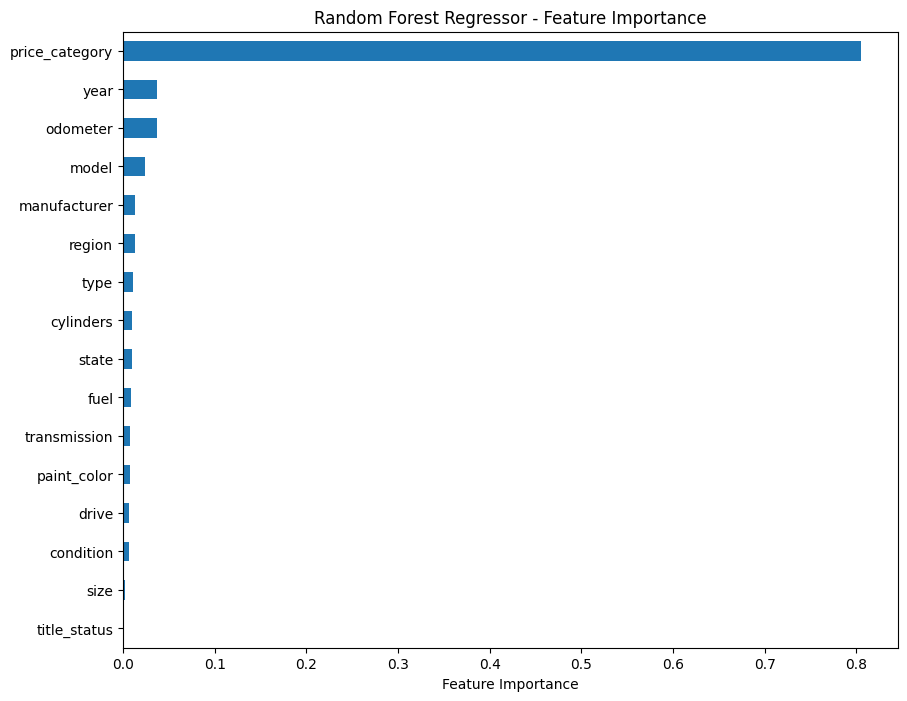

In [298]:
#Model Run 4

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.1970
Test set accuracy with best model: 0.2232
Mean Squared Error (MSE): 128799808.9174
R² score: 0.5340


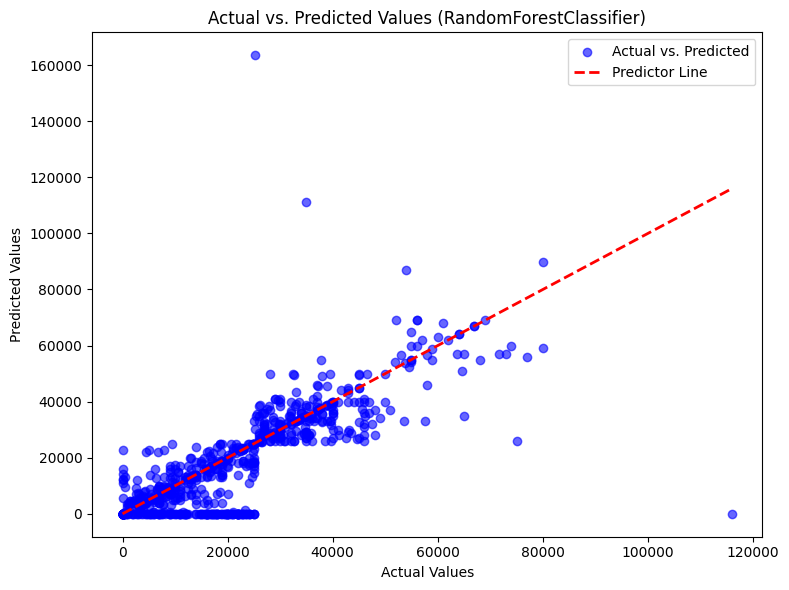

In [300]:
# Model Run 5

#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']


#Using gridsearch to tune the hyperparameters of the ML model to improve the performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set with the best model
est_rf = grid_search.best_estimator_
y_pred = est_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best model: {accuracy:.4f}")

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² score: {r2:.4f}")


# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Plot the predictor line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predictor Line')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestClassifier)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Best cross-validation MSE: 31193328.6885
Test set Mean Squared Error (MSE): 33718988.2918
Test set R² score: 0.8780


<ipython-input-304-4e3e8285f3ed>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


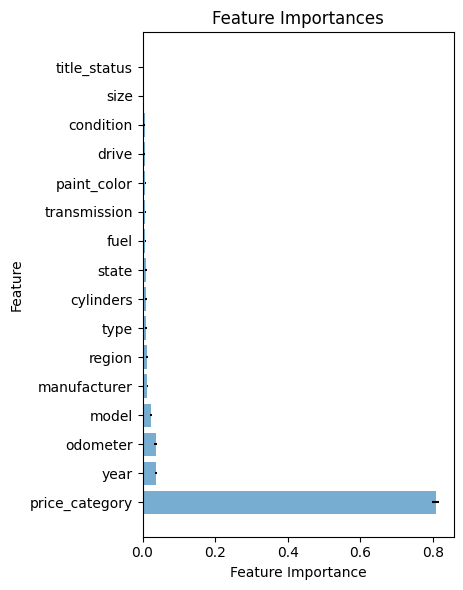

In [304]:
# Model Run 6

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation MSE: {abs(random_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Plot the predictor line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predictor Line')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestRegressor)')
plt.legend()

plt.subplot(1, 2, 2)
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names

plt.barh(range(X_train.shape[1]), importances[indices], xerr=std[indices], align='center', alpha=0.6)
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show plot
plt.tight_layout()
plt.show()

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Best cross-validation MSE: 31193328.6885
Test set Mean Squared Error (MSE): 33718988.2918
Test set R² score: 0.8780
Feature importances:
price_category: 0.8081
year: 0.0372
odometer: 0.0365
model: 0.0234
manufacturer: 0.0136
region: 0.0131
type: 0.0105
cylinders: 0.0099
state: 0.0099
fuel: 0.0081
transmission: 0.0076
paint_color: 0.0071
drive: 0.0066
condition: 0.0060
size: 0.0018
title_status: 0.0007


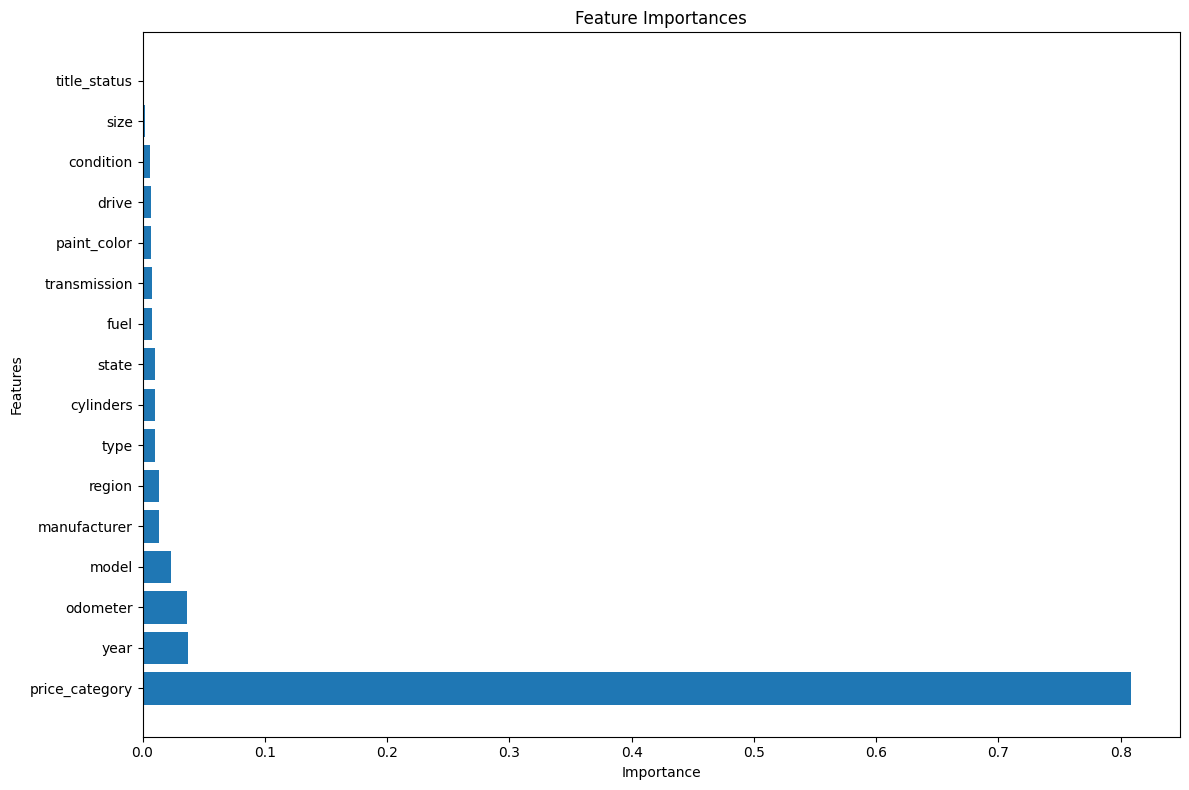

In [305]:
#Model Run 7

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation MSE: {abs(random_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")

# Feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [309]:
# Model Run 8 Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('regressor', LinearRegression())  # Step 2: Linear Regression model
])

# Define a parameter grid for GridSearchCV (adjust according to LinearRegression's valid parameters)
param_grid = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'regressor__positive': [True, False]  # Whether to enforce positive coefficients
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation MSE: {abs(grid_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")


Best parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}
Best cross-validation MSE: 82751083.8146
Test set Mean Squared Error (MSE): 85454379.0829
Test set R² score: 0.6908


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage